In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape

(1067371, 8)

In [4]:
#To check missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [5]:
df["Customer ID"] = df["Customer ID"].replace('', "Unknown").fillna("Unknown")
df["Description"] = df["Description"].replace('', "Unknown").fillna("Unknown")

In [6]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [7]:
df = df[df['Quantity'] > 0]                       
df['TotalSales'] = df['Quantity'] * df['Price']   # Add total sales column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [9]:
df["Country"].unique().tolist()

['United Kingdom',
 'France',
 'USA',
 'Belgium',
 'Australia',
 'EIRE',
 'Germany',
 'Portugal',
 'Denmark',
 'Netherlands',
 'Poland',
 'Channel Islands',
 'Spain',
 'Cyprus',
 'Greece',
 'Norway',
 'Austria',
 'Sweden',
 'United Arab Emirates',
 'Finland',
 'Italy',
 'Switzerland',
 'Japan',
 'Unspecified',
 'Nigeria',
 'Malta',
 'Bahrain',
 'RSA',
 'Bermuda',
 'Hong Kong',
 'Singapore',
 'Thailand',
 'Israel',
 'Lithuania',
 'West Indies',
 'Lebanon',
 'Korea',
 'Brazil',
 'Canada',
 'Iceland',
 'Saudi Arabia',
 'Czech Republic',
 'European Community']

In [10]:
#Spliting the Invoice date into date and time
df["Invoice_Date"] = df["InvoiceDate"].dt.date
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,Invoice_Date,InvoiceTime
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00


In [11]:
df = df.drop(columns="InvoiceDate") #To drop Invoicedate after splicting it into date and time
df.head(1)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,TotalSales,Invoice_Date,InvoiceTime
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00


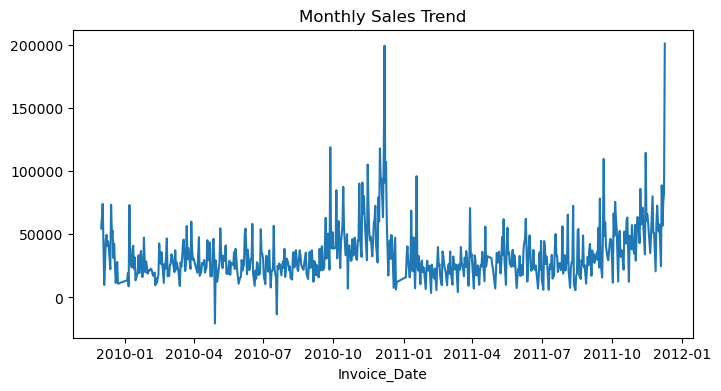

In [12]:
# Monthly sales trend
sales_trend = df.groupby(df['Invoice_Date'])['TotalSales'].sum()
sales_trend.plot(kind='line', figsize=(8,4))
plt.title("Monthly Sales Trend")
plt.show()


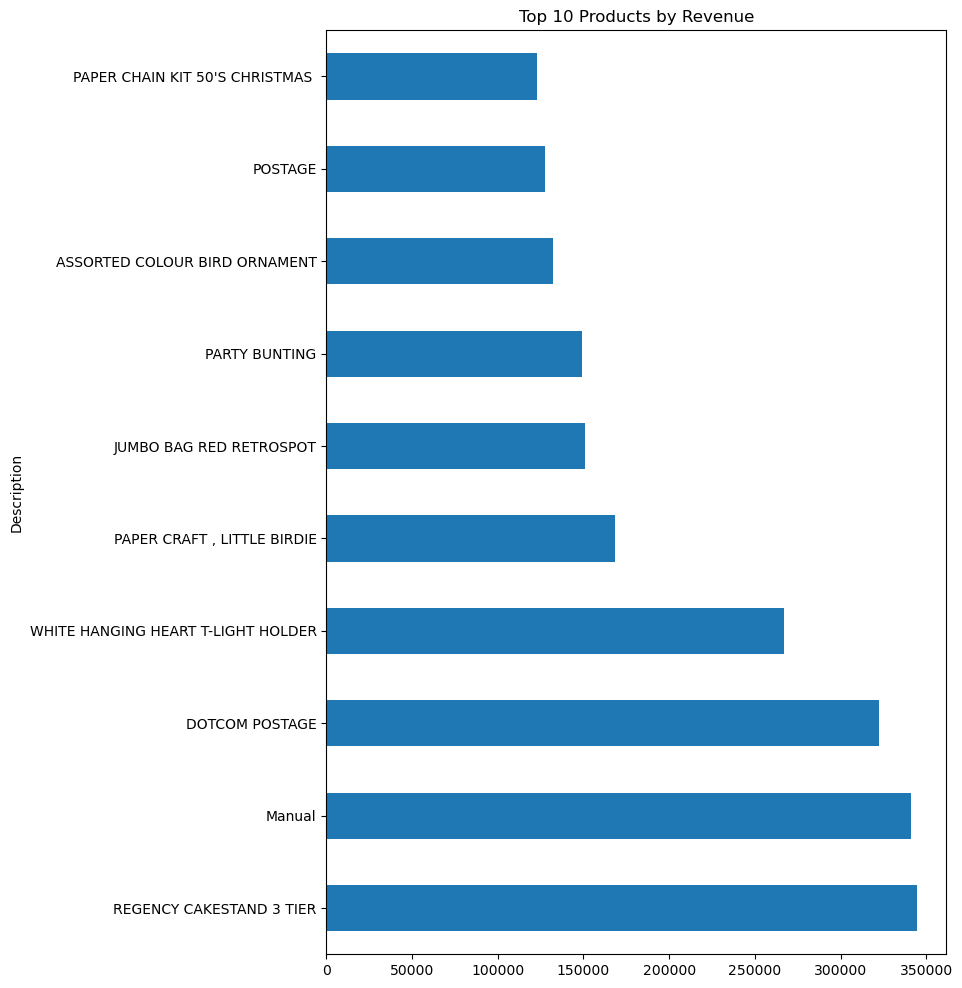

In [13]:
# Top products
top_products = df.groupby('Description')['TotalSales'].sum().nlargest(10)
top_products.plot(kind='barh', figsize = (8,12))
plt.title("Top 10 Products by Revenue")
plt.show()

In [14]:
df.shape

(1044421, 10)

In [15]:
df = df.to_csv("mini.csv", index = False)
print(f"✅ Complete")

✅ Complete
